In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [44]:
training = pd.read_csv('Downloads/Training Data.csv')
training.head(10)

,Id,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [42]:
test = pd.read_csv('Downloads/Test Data.csv')
training.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
5,6,6915937,64,0,1,2,0,11,130,14,0,12,0
6,7,3954973,58,14,0,2,0,31,299,22,8,12,0
7,8,1706172,33,2,1,2,0,20,134,6,2,14,0
8,9,7566849,24,17,1,2,1,25,165,20,11,11,0
9,10,8964846,23,12,1,2,0,2,149,23,5,13,0


In [43]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Married/Single','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
le = LabelEncoder()
for i in var_mod:
    training[i] = le.fit_transform(training[i])

In [5]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Married/Single','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [6]:
array = test.values
x_test = array[:,6:11]
y_test = array[:,12]

In [7]:
array1 = training.values
x_train = array1[:,6:11]
y_train = array1[:,12]

## Logistic Regression

In [8]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8716785714285714


## Multiple Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(x_test)

In [14]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,0,0.130636
1,0,0.129830
2,1,0.125580
3,0,0.118864
4,0,0.099609
...,...,...
27995,0,0.128311
27996,1,0.123252
27997,0,0.131558
27998,0,0.102339


## Decision Tree

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [16]:
names = ['Id','Income','Age','Experience','Married/Single','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','risk_flag']
col_names = ['Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS']


In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7738214285714285


In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [22]:
brew install graphviz

SyntaxError: invalid syntax (<ipython-input-22-fdad2a31faa2>, line 1)

In [21]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt


In [31]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt



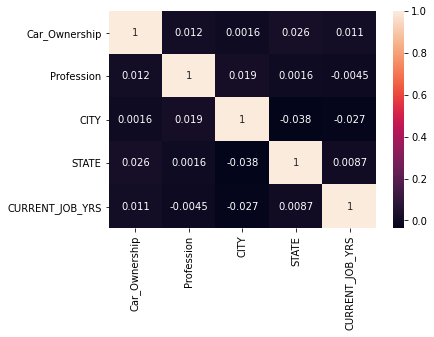

In [35]:
df = pd.DataFrame(training,columns=['Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

In [51]:
anova = smf.ols(formula='Risk_Flag ~ Id+Income+Age+Experience+Married_Single+House_Ownership+Car_Ownership+CURRENT_JOB_YRS+CURRENT_HOUSE_YRS', data=training).fit()

print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:              Risk_Flag   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     113.0
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          5.36e-236
Time:                        11:23:34   Log-Likelihood:                -76429.
No. Observations:              252000   AIC:                         1.529e+05
Df Residuals:                  251989   BIC:                         1.530e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             